<a href="https://colab.research.google.com/github/HowardHNguyen/Python/blob/main/Time_Series_Birthrate_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series - Birthrate Prediction**
includes in this notebook:

1.   Data Analysis Data Manupulation
2.   Data Visualization
3.   Mean, Std
4.   Prediction Forecasting
5.   LSTMS and BiLSTMS
6.   Perfromance Analysis

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Import Dataset
df=pd.read_csv('/content/drive/MyDrive/_Python/A-Practical-Approach-to-Timeseries-Forecasting/9 - Project 3 Birthrate Forecasting using RNNs with Advance Data Analysis/Notebook/BirthR.csv')

In [4]:
df.head()

,Date,births,year,month,date_of_month,day_of_week
0,1/1/1994,8096,1994,1,1,6
1,1/2/1994,7772,1994,1,2,7
2,1/3/1994,10142,1994,1,3,1
3,1/4/1994,11248,1994,1,4,2
4,1/5/1994,11053,1994,1,5,3


In [5]:
df.tail()

,Date,births,year,month,date_of_month,day_of_week
7665,12/27/2014,8656,2014,12,27,6
7666,12/28/2014,7724,2014,12,28,7
7667,12/29/2014,12811,2014,12,29,1
7668,12/30/2014,13634,2014,12,30,2
7669,12/31/2014,11990,2014,12,31,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           7670 non-null   object
 1   births         7670 non-null   int64 
 2   year           7670 non-null   int64 
 3   month          7670 non-null   int64 
 4   date_of_month  7670 non-null   int64 
 5   day_of_week    7670 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 359.7+ KB


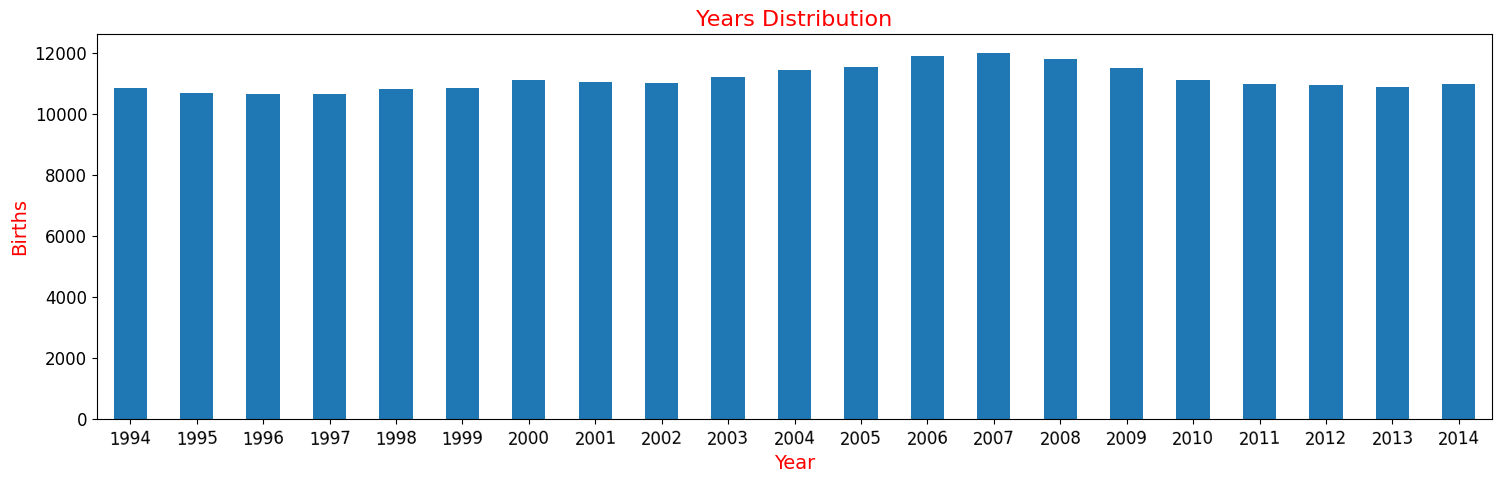

In [7]:
# birthrate according to year
#Bar plot (babies per year)
plt.figure(figsize=(18,5))
dist1=df.groupby("year")["births"].mean()
dist1.plot(kind='bar', rot=2)
plt.xlabel("Year", fontsize=14, color="r")
plt.ylabel("Births", fontsize=14, color="r")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Years Distribution", fontsize=16,color="r")
plt.show()

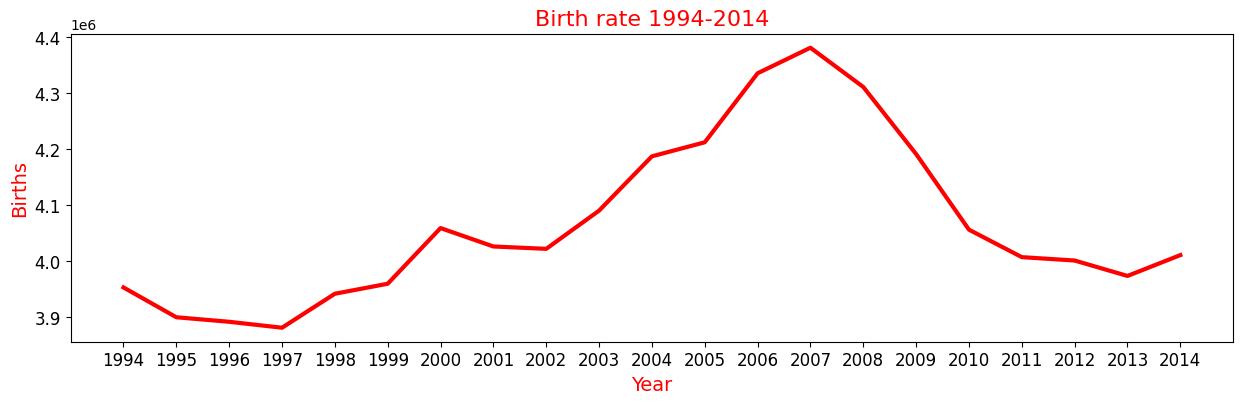

In [8]:
plt.figure(figsize=(15,4))
year_sum=df.groupby("year")[['births']].sum()
plt.plot(year_sum,linewidth=3,color="r")
plt.xlabel("Year", fontsize=14, color="r")
plt.ylabel("Births", fontsize=14, color="r")
plt.xticks(range(1994,2015,1),fontsize=12)
plt.yticks(fontsize=12)
plt.title("Birth rate 1994-2014", fontsize=16,color="r")
plt.show()

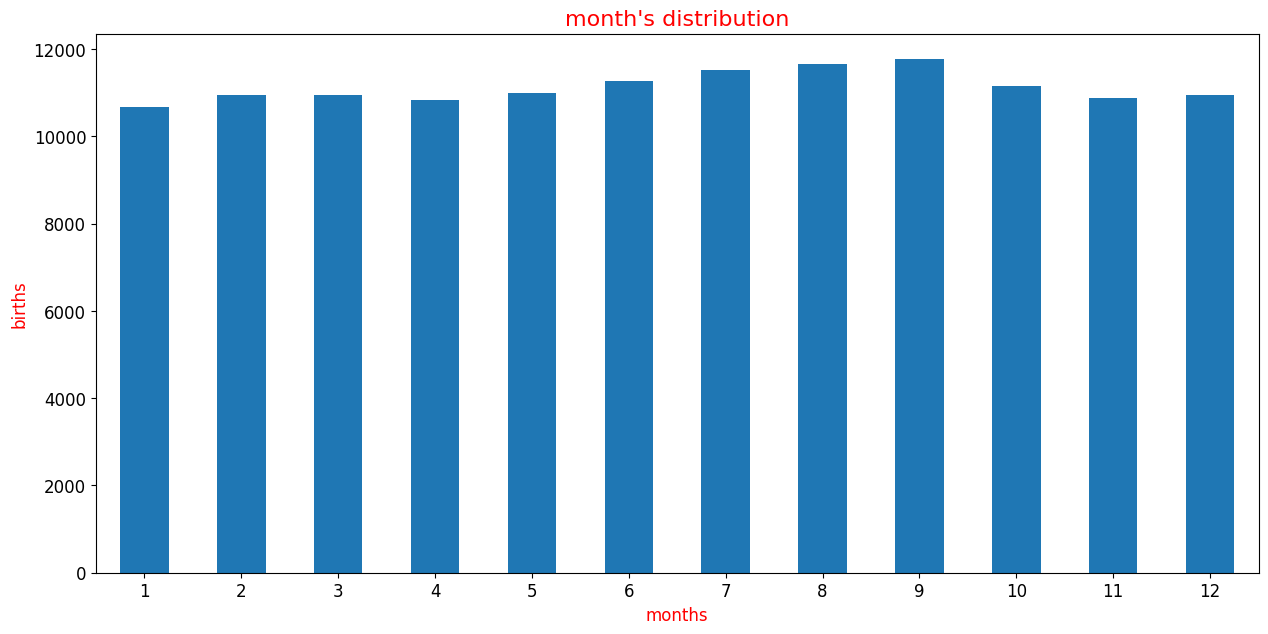

In [9]:
#distribution of birth per month
#birth rate per month
plt.figure(figsize=(15,7))
dist1=df.groupby("month")["births"].mean()

dist1.plot(kind='bar', rot=0)
plt.xlabel("months",fontsize=12,color="r")
plt.ylabel("births", fontsize=12,color="r")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("month's distribution", fontsize=16,color="r")
plt.show()

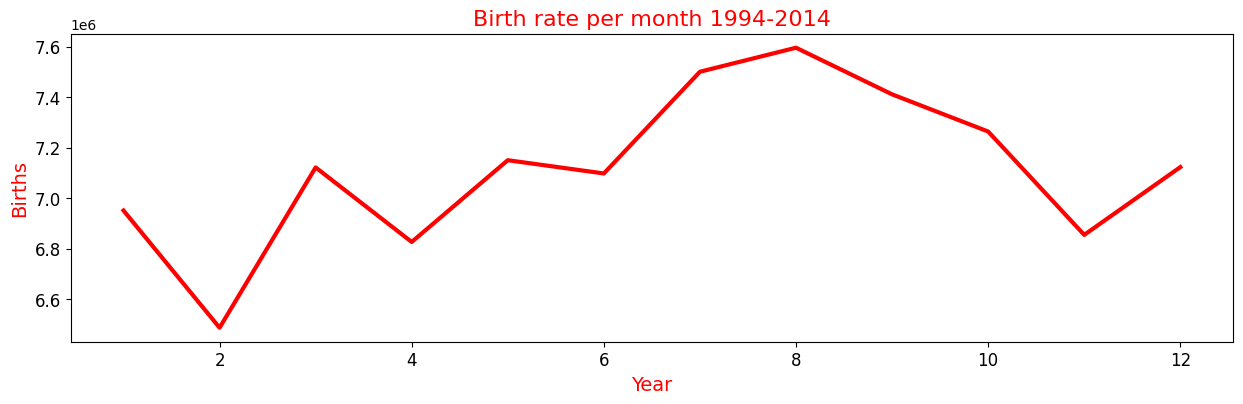

In [10]:
plt.figure(figsize=(15,4))
mon_sum=df.groupby("month")[['births']].sum()
plt.plot(mon_sum,linewidth=3,color="r")
plt.xlabel("Year", fontsize=14, color="r")
plt.ylabel("Births", fontsize=14, color="r")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Birth rate per month 1994-2014", fontsize=16,color="r")
plt.show()

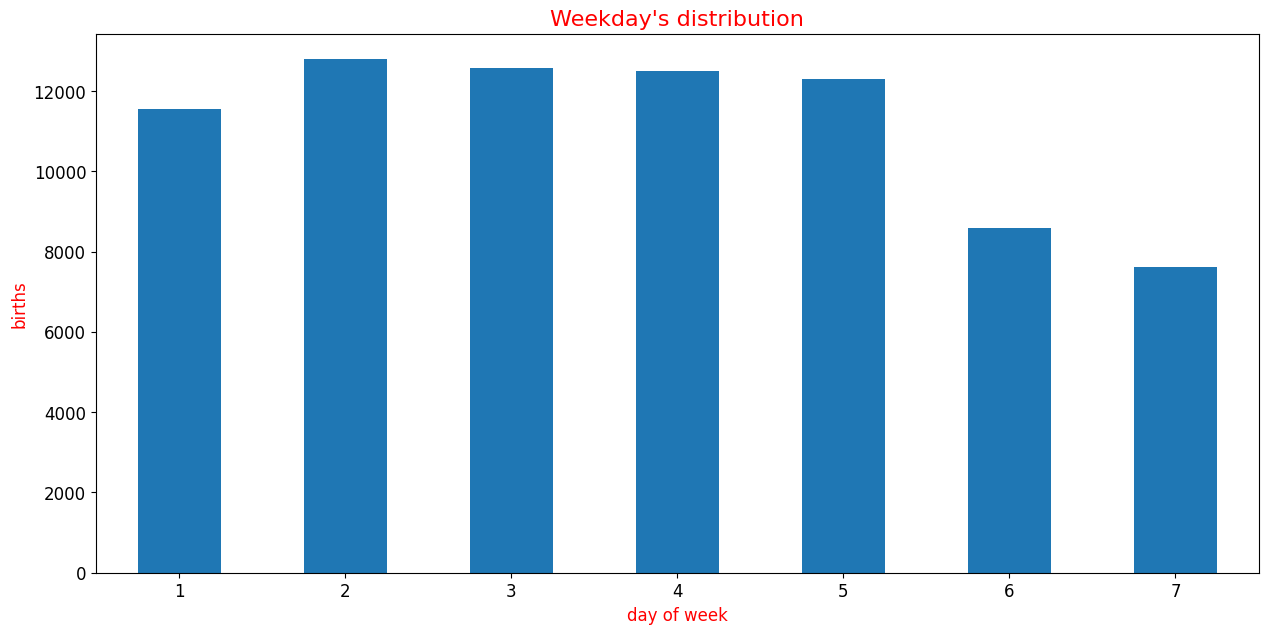

In [11]:
#distribution of birth per week days
#birth rate per week days

plt.figure(figsize=(15,7))
dist1=df.groupby("day_of_week")["births"].mean()

dist1.plot(kind='bar', rot=0)
plt.xlabel("day of week",fontsize=12,color="r")
plt.ylabel("births", fontsize=12,color="r")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Weekday's distribution", fontsize=16,color="r")
plt.show()

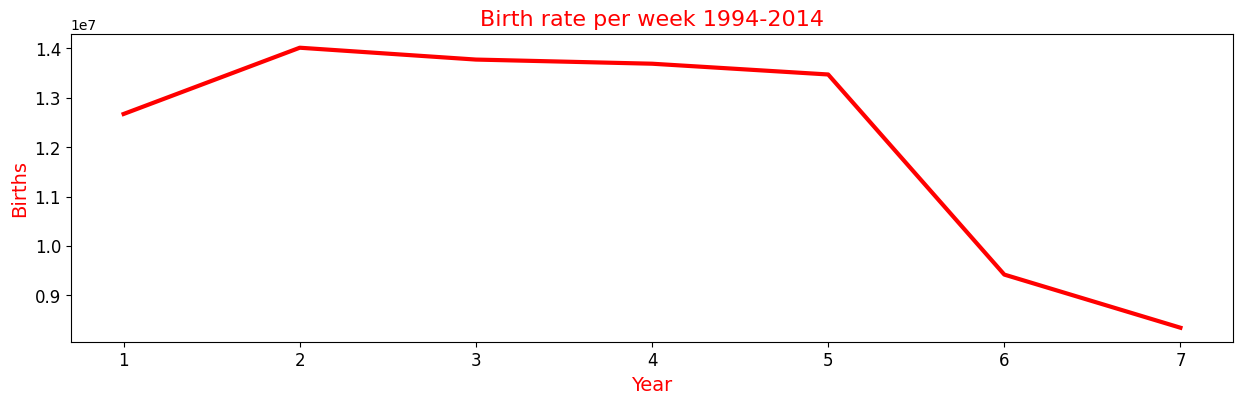

In [12]:
plt.figure(figsize=(15,4))
week_sum=df.groupby("day_of_week")[['births']].sum()
plt.plot(week_sum,linewidth=3,color="r")
plt.xlabel("Year", fontsize=14, color="r")
plt.ylabel("Births", fontsize=14, color="r")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Birth rate per week 1994-2014", fontsize=16,color="r")
plt.show()

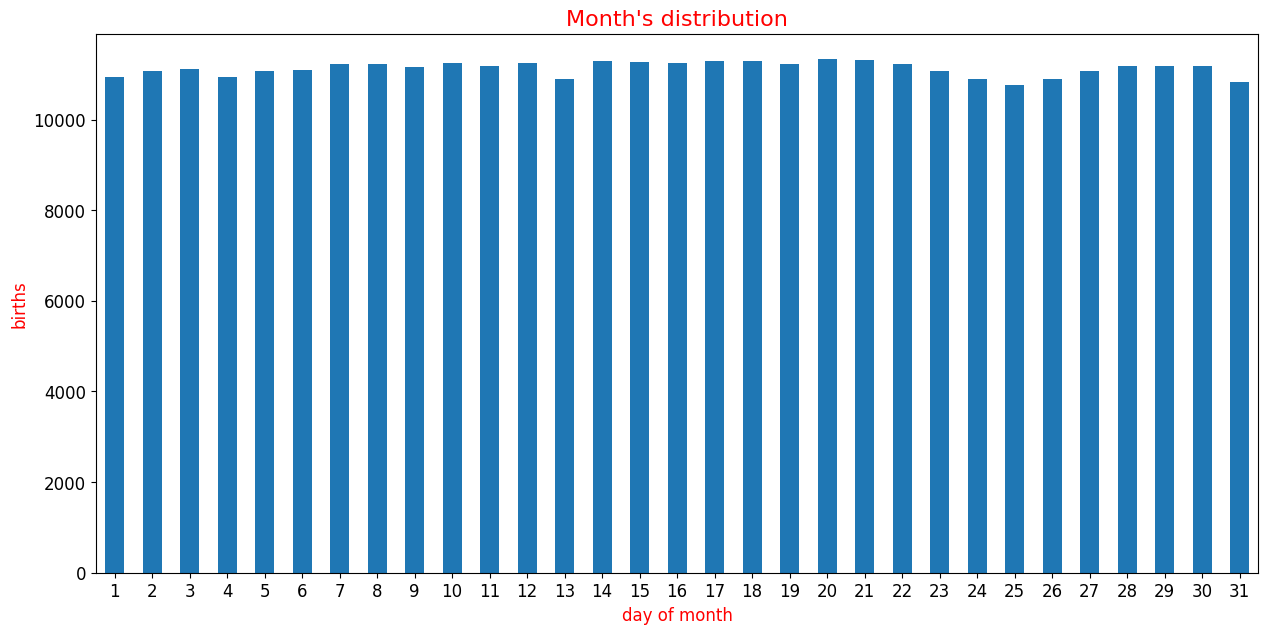

In [13]:
plt.figure(figsize=(15,7))
dist1=df.groupby("date_of_month")["births"].mean()

dist1.plot(kind='bar', rot=0)
plt.xlabel("day of month",fontsize=12,color="r")
plt.ylabel("births", fontsize=12,color="r")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Month's distribution", fontsize=16,color="r")
plt.show()

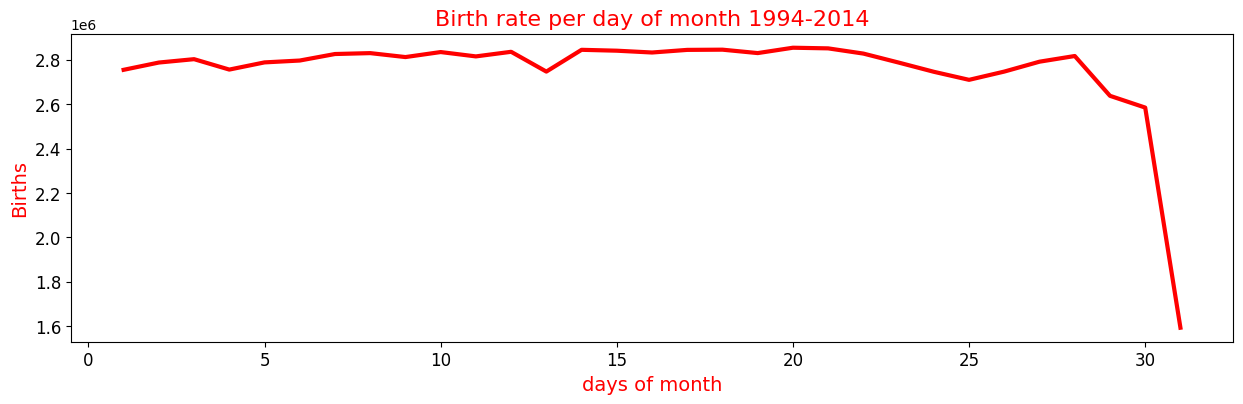

In [14]:
plt.figure(figsize=(15,4))
Date_month_sum=df.groupby("date_of_month")[['births']].sum()
plt.plot(Date_month_sum,linewidth=3,color="r")
plt.xlabel("days of month", fontsize=14, color="r")
plt.ylabel("Births", fontsize=14, color="r")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Birth rate per day of month 1994-2014", fontsize=16,color="r")
plt.show()

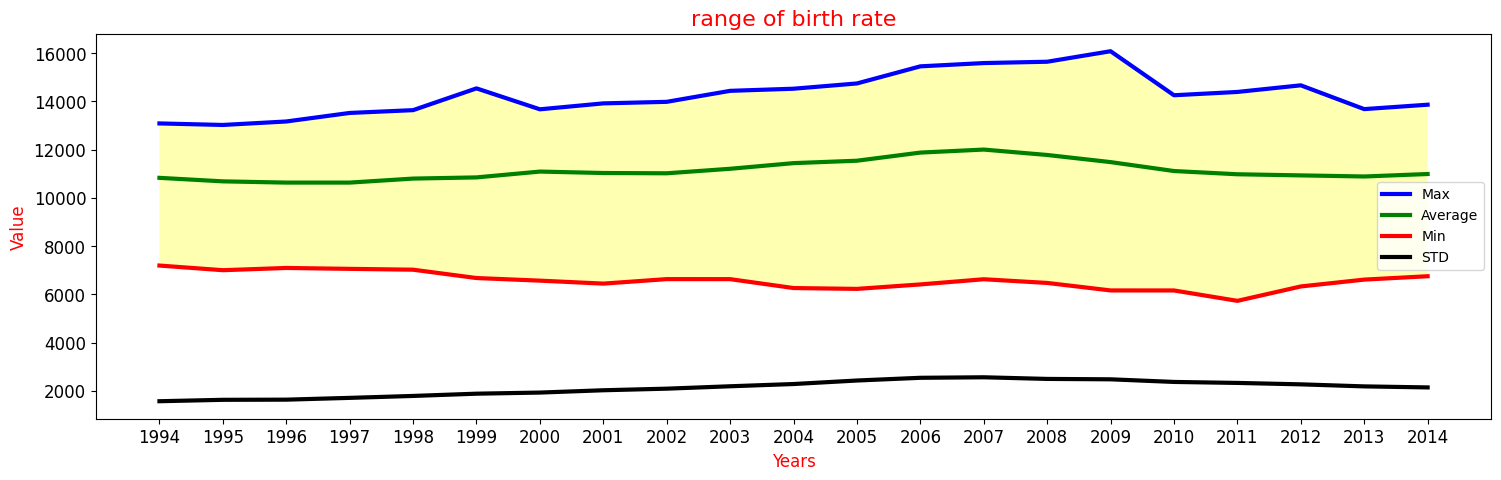

In [15]:
#Range of birthrate per year

plt.figure(figsize=(18,5))
year_min=df.groupby("year")[['births']].min()
year_max=df.groupby("year")[['births']].max()
year_mean=df.groupby("year")[['births']].mean()
year_std=df.groupby("year")[['births']].std()

x=year_mean.index
plt.plot(year_max,linewidth=3,label="Max",color="b")
plt.plot(year_mean,linewidth=3,label="Average",color="g")
plt.plot(year_min,linewidth=3,label="Min",color="r")
plt.plot(year_std,linewidth=3,label="STD",color="k")

plt.fill_between(x,year_min["births"],year_max["births"],alpha=0.3, facecolor='yellow')
plt.xticks(range(1994,2015,1), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Years", fontsize=12,color="r")
plt.ylabel("Value", fontsize=12,color="r")
plt.title("range of birth rate", fontsize=16,color="r")
plt.legend(loc='best')
plt.draw()

In [16]:
df.describe()

,births,year,month,date_of_month,day_of_week
count,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000
mean,11132.493742,2004.000000,6.523077,15.729205,3.999870
std,2172.398653,6.055444,3.448888,8.800483,2.000359
min,5728.000000,1994.000000,1.000000,1.000000,1.000000
25%,8759.000000,1999.000000,4.000000,8.000000,2.000000
50%,11941.000000,2004.000000,7.000000,16.000000,4.000000
75%,12754.750000,2009.000000,10.000000,23.000000,6.000000
max,16081.000000,2014.000000,12.000000,31.000000,7.000000


In [17]:
df.corr()

,births,year,month,date_of_month,day_of_week
births,1.000000,7.596776e-02,6.016844e-02,-3.189555e-03,-0.674588
year,0.075968,1.000000e+00,2.139539e-14,2.020319e-15,-0.000344
month,0.060168,2.139539e-14,1.000000e+00,1.058747e-02,0.000104
date_of_month,-0.003190,2.020319e-15,1.058747e-02,1.000000e+00,0.000072
day_of_week,-0.674588,-3.444747e-04,1.043892e-04,7.206498e-05,1.000000


In [18]:
df.shape

(7670, 6)

In [19]:
df.columns

Index(['Date', 'births', 'year', 'month', 'date_of_month', 'day_of_week'], dtype='object')

In [20]:
df.isnull().any()

Date             False
births           False
year             False
month            False
date_of_month    False
day_of_week      False
dtype: bool

In [21]:
#stationarity check
from statsmodels.tsa.stattools import adfuller

In [22]:
X= df.births.values
result=adfuller(X)
print('ADF Statistics:%f'%result[0])
print('p-value:%f'%result[1])
print('critical values')
for key,value in result[4].items():
    print('\t%s: %.3f'%(key,value))

ADF Statistics:-4.085969
p-value:0.001022
critical values
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [23]:
df['Date']

0         1/1/1994
1         1/2/1994
2         1/3/1994
3         1/4/1994
4         1/5/1994
           ...    
7665    12/27/2014
7666    12/28/2014
7667    12/29/2014
7668    12/30/2014
7669    12/31/2014
Name: Date, Length: 7670, dtype: object

In [24]:
train_dates=pd.to_datetime(df['Date'])
train_dates

0      1994-01-01
1      1994-01-02
2      1994-01-03
3      1994-01-04
4      1994-01-05
          ...    
7665   2014-12-27
7666   2014-12-28
7667   2014-12-29
7668   2014-12-30
7669   2014-12-31
Name: Date, Length: 7670, dtype: datetime64[ns]

In [25]:
cols= list(df)[1:2]
cols

['births']

In [26]:
df_for_training=df[cols].astype(float)

In [27]:
df_for_training

,births
0,8096.0
1,7772.0
2,10142.0
3,11248.0
4,11053.0
...,...
7665,8656.0
7666,7724.0
7667,12811.0
7668,13634.0


<Axes: >

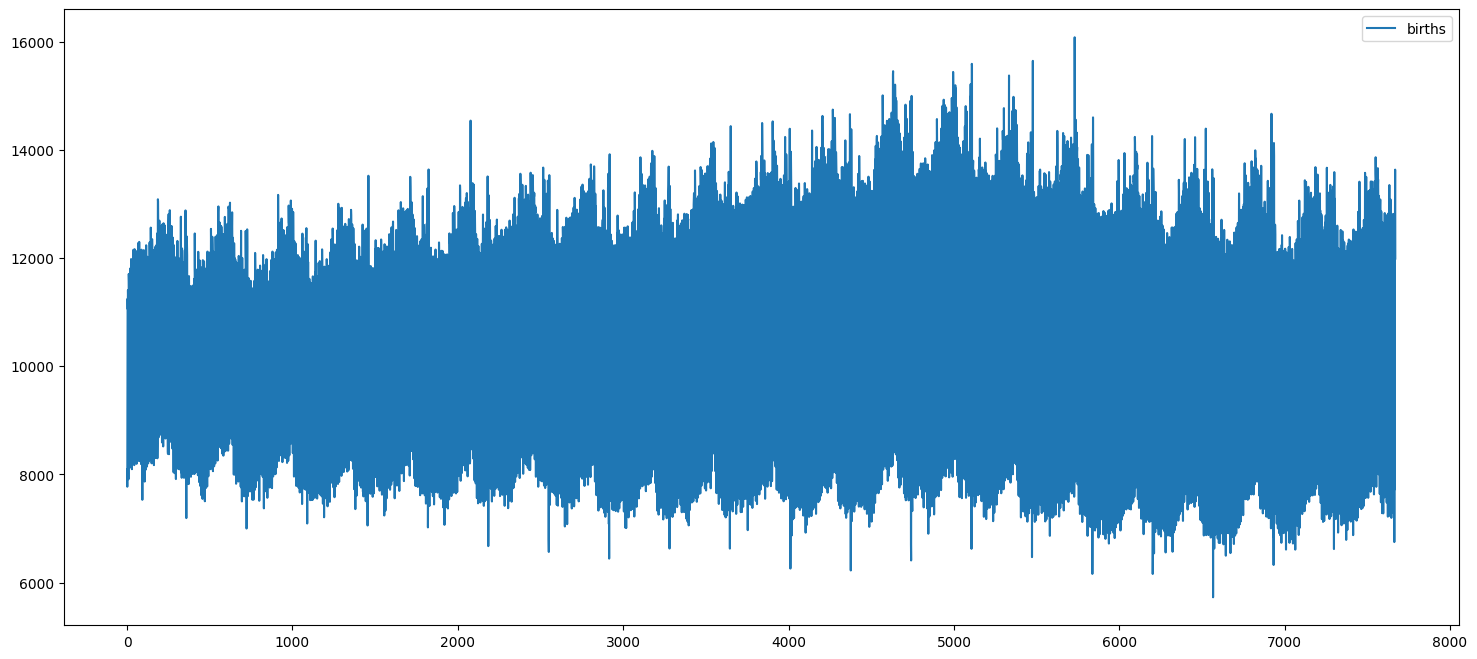

In [28]:
df_for_plot=df_for_training
df_for_plot.plot.line(figsize=(18,8))

In [29]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler=scaler.fit(df_for_training)
df_for_training_scaled=scaler.transform(df_for_training)

df_for_training_scaled

array([[-1.39785196],
       [-1.54700558],
       [-0.45597447],
       ...,
       [ 0.7727015 ],
       [ 1.15157011],
       [ 0.39475359]])

In [30]:
df_for_training.shape[1]

1

In [31]:
trainX=[]
trainY=[]

n_future = 100
n_past = 20

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY =np.array(trainX), np.array(trainY)

print('trainX shape==={}.'.format(trainX.shape))
print('trainY shape==={}.'.format(trainY.shape))

trainX shape===(7551, 20, 1).
trainY shape===(7551, 1).


In [32]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

In [33]:
model=Sequential()

# model.add(LSTM(32,activation='relu', input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(Bidirectional(LSTM(32, return_sequences=True),input_shape=(trainX.shape[1],trainX.shape[2])))
model.add(Dropout(0.5))

model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))

model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 20, 64)            8704      
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 20, 64)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 33601 (131.25 KB)
Trainable params: 33601 

In [34]:
history=model.fit(trainX, trainY, epochs=100, batch_size=10, validation_split=0.1,verbose=1)

Epoch 1/100
680/680 [==============================] - 35s 37ms/step - loss: 0.3891 - val_loss: 0.2374
Epoch 2/100
680/680 [==============================] - 24s 35ms/step - loss: 0.2300 - val_loss: 0.2181
Epoch 3/100
680/680 [==============================] - 26s 38ms/step - loss: 0.2102 - val_loss: 0.2305
Epoch 4/100
680/680 [==============================] - 22s 33ms/step - loss: 0.2028 - val_loss: 0.2066
Epoch 5/100
680/680 [==============================] - 23s 34ms/step - loss: 0.1965 - val_loss: 0.2125
Epoch 6/100
680/680 [==============================] - 23s 33ms/step - loss: 0.1881 - val_loss: 0.2025
Epoch 7/100
680/680 [==============================] - 25s 36ms/step - loss: 0.1844 - val_loss: 0.1896
Epoch 8/100
680/680 [==============================] - 26s 38ms/step - loss: 0.1798 - val_loss: 0.2131
Epoch 9/100
680/680 [==============================] - 24s 35ms/step - loss: 0.1752 - val_loss: 0.1877
Epoch 10/100
680/680 [==============================] - 25s 36ms/step - l

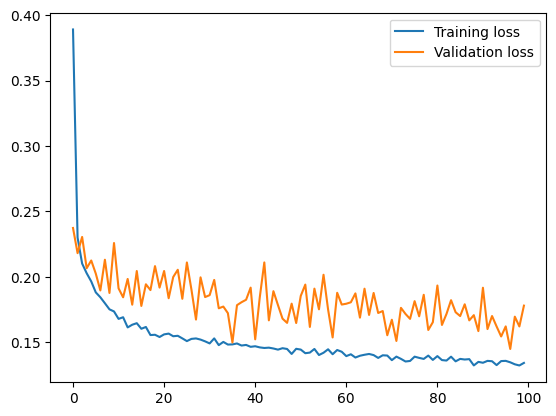

In [35]:
plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [36]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [37]:
n_past = 10
n_days_for_prediction=100

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()

In [38]:
prediction = model.predict(trainX[-n_days_for_prediction:])

4/4 [==============================] - 3s 10ms/step


In [39]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
prediction_copies.shape

(100, 1)

In [40]:
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [41]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'births':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

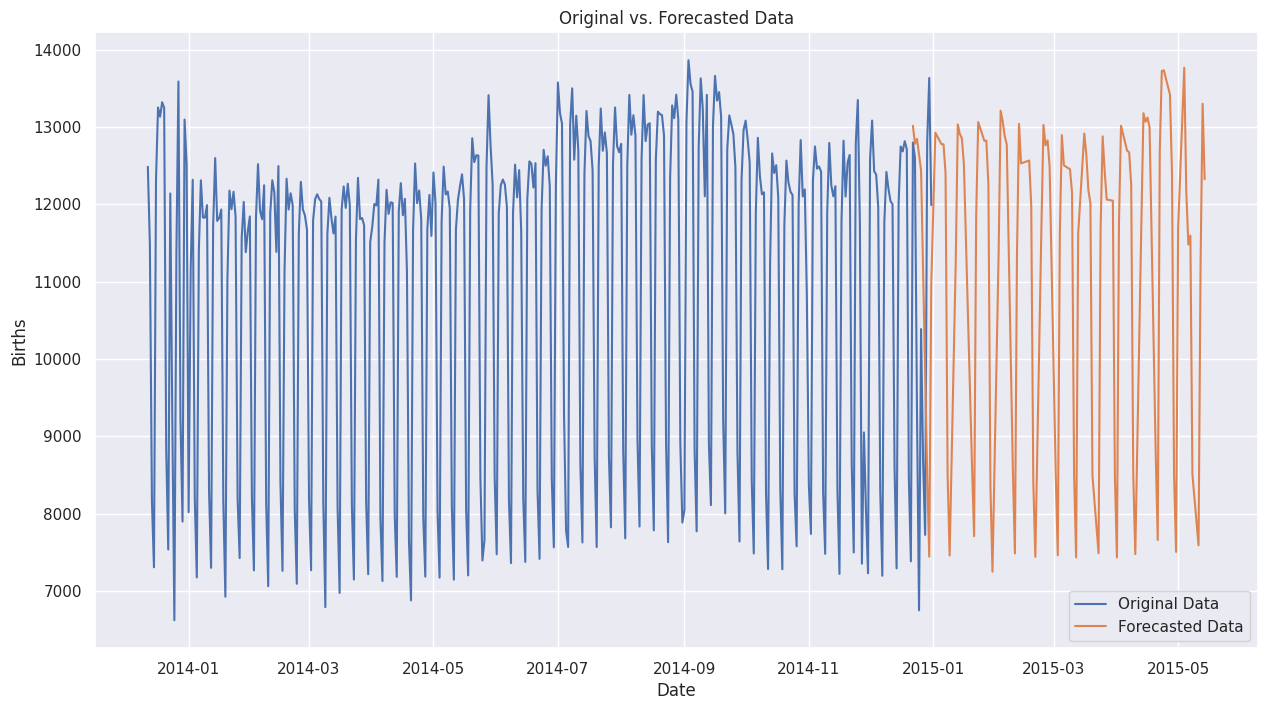

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

original = df[['Date', 'births']]
original['Date'] = pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2013-12-12']

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(15, 8))

# Plot the original data
sns.lineplot(data=original, x='Date', y='births', ax=ax, label='Original Data')

# Plot the forecasted data (assuming df_forecast is defined)
sns.lineplot(data=df_forecast, x='Date', y='births', ax=ax, label='Forecasted Data')

# Add labels, legend, and title
plt.xlabel('Date')
plt.ylabel('Births')
plt.title('Original vs. Forecasted Data')
plt.legend()

# Show the plot
plt.show()